**Yapacağınız yorumlar için şimdiden teşekkür ederim. Çalışmayı beğenirseniz oylamayı unutmayın lütfen ^___^.  Sorulara elimden geldiği kadarıyla cevap vermeye çalışacağım. Çalışmanın altına yazılan sorulara ve geri bildirimlere göre düzeltme ve ekleme yapacağım.**

# <a class="anchor" id="0."></a>**İçindekiler**

* [1. Çalışmanın Özeti](#1.)
* [2. Gerekli Kütüphanelerin Dahil Edilmesi](#2.)
* [3. Veri Setlerinin Yüklenmesi](#3.)
* [4. Veri Seti Hakkında Bağlamsal Değerlendirme](#4.)
* [5. Veri Seti Hakkında Teknik Değerlendirme](#5.)
* [6. Yardımcı Fonksiyon:show_missing_values()](#6.)
* [7. Özelliklerin Birbirleriyle Olan Korelasyonları](#7.)
* * [7.1. SalePrice İle En Yüksek Korelasyona Sahip Özellikler](#7.1.)
* [8. Yardımcı Fonksiyon:draw_scatter_pairs()](#8.)
* * [8.1 SalePrice İle En Yüksek Korelasyona Sahip Özelliklerin Scatter Grafikleri](#8.1.)
* [9. Aykırı Değerlerin Çıkarılması](#9.)
* [10. Ön İşleme İçin train ve test Veri Setlerinin Birleştirilmesi](#10.)
* [11. Ön İşleme Stratejilerinin Belirlenmesi](#11.)
* [12. Yardımcı Fonksiyon: fill_missing_values()](#12.)
* [13. Eksik Değerlerin Doldurulması](#13.)
* [14. Metin Değerlerinin Sayısala Dönüştürülmesi](#14.)
* [15. Özellik Mühendisliği](#15.)
* * [15.1. Sayısal Değerlerin Normal Dağılıma Çekilmesi](#15.1.)
* [16. Özelliklerin Önemi](#16.)
* [17. Makine Öğrenmesi Modellerinin Uygulanması](#17.)
* * [17.1. Ölçeklendirme](#17.1.)
* * [17.2. train ve test Veri Setlerinin Ayrıştırılması](#17.2.)
* * [17.3. Yardımcı Fonksiyon: rmsle_cv()](#17.3.)
* * [17.4. XGBoost(“Extreme Gradient Boosting)](#17.4.)
* * [17.5. Kullanılacak Regressörlerin Parametre Ataması](#17.5.)
* * [17.6. En İyi Modelin Eğitilmesi](#17.6.)
* * [17.7. Gönderinin Hazırlanması](#17.7.)
* [18. Makine Öğrenmesi Modelinin Kaydedilmesi](#18.)

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)




[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="1."></a>**1. Çalışmanın Özeti** 
* Veri setlerinin yüklenmesi
* Eksik bilgilerin doldurulması
* xgboost Regressörün eğitimi(Karar ağacı tabanlı bir yöntem olduğu için ölçeklendirmeye ihtiyaç duyulmamıştır)
* Yarışma için gönderinin hazırlanması

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="2."></a>**2. Gerekli Kütüphanelerin Dahil Edilmesi** 

In [1]:
# Gerekli kütüphaneler geliştirme ortamına dahil ediliyor

#Veri işleme kütüphanleri
import numpy as np 
import pandas as pd 

#Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

#istatistik kütüphaneleri
from scipy import stats
from scipy.stats import norm, skew 

#Makine öğrenmesi kütüphaneleri
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'data_description.txt', 'sample_submission.csv']


[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="3."></a>**3. Veri Setlerinin Yüklenmesi**

In [2]:
#Eğitim ve test veri setleri yükleniyor
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

#Gönderi hazırlanırken lazım olacağı için veri setlerindeki örneklerin
# id numaralarını tutuyoruz
train_ids=train['Id']
test_ids=test['Id']

# Makine öğrenemsi modelleri için id numarasının anlamı olmadığı için
# veri setinden çıkartıyoruz
train.drop('Id',axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)

In [3]:
train.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="4."></a>**4. Veri Seti Hakkında Bağlamsal Değerlendirme** 

Veri kümesindeki her özelliğin kısaca açıklaması söyledir:

* SalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalışılan hedef değişkendir.
* MSSubClass: İnşaat sınıfı
* MSZoning: Genel imar sınıflandırması
* LotFrontage: Mülkiyetin cadde ile doğrudan bağlantısının olup olmaması
* LotArea: Parsel büyüklüğü
* Street: Yol erişiminin tipi
* Alley: Sokak girişi tipi
* LotShape: Mülkün genel şekli
* LandContour: Mülkün düzlüğü
* Utulities: Mevcut hizmetlerin türü
* LotConfig: Parsel yapılandırması
* LandSlope: Mülkün eğimi
* Neighborhood: Ames şehir sınırları içindeki fiziksel konumu
* Condition1: Ana yol veya tren yoluna yakınlık
* Condition2: Ana yola veya demiryoluna yakınlık (eğer ikinci bir yer varsa)
* BldgType: Konut tipi
* HouseStyle: Konut sitili
* OverallQual: Genel malzeme ve bitiş kalitesi
* OverallCond: Genel durum değerlendirmesi
* YearBuilt: Orijinal yapım tarihi
* YearRemodAdd: Yeniden düzenleme tarihi
* RoofStyle: Çatı tipi
* RoofMatl: Çatı malzemesi
* Exterior1st: Evdeki dış kaplama
* Exterior2nd: Evdeki dış kaplama (birden fazla malzeme varsa)
* MasVnrType: Duvar kaplama türü
* MasVnrArea: Kare ayaklı duvar kaplama alanı
* ExterQual: Dış malzeme kalitesi
* ExterCond: Malzemenin dışta mevcut durumu
* Foundation: Vakıf tipi
* BsmtQual: Bodrumun yüksekliği
* BsmtCond: Bodrum katının genel durumu
* BsmtExposure: Yürüyüş veya bahçe katı bodrum duvarları
* BsmtFinType1: Bodrum bitmiş alanının kalitesi
* BsmtFinSF1: Tip 1 bitmiş alanın metre karesi
* BsmtFinType2: İkinci bitmiş alanın kalitesi (varsa)
* BsmtFinSF2: Tip 2 bitmiş alanın metre karesi
* BsmtUnfSF: Bodrumun bitmemiş alanın metre karesi
* TotalBsmtSF: Bodrum alanının toplam metre karesi
* Heating: Isıtma tipi
* HeatingQC: Isıtma kalitesi ve durumu
* CentralAir: Merkezi klima
* Electrical: elektrik sistemi
* 1stFlrSF: Birinci Kat metre kare alanı
* 2ndFlrSF: İkinci kat metre kare alanı
* LowQualFinSF: Düşük kaliteli bitmiş alanlar (tüm katlar)
* GrLivArea: Üstü (zemin) oturma alanı metre karesi
* BsmtFullBath: Bodrum katındaki tam banyolar
* BsmtHalfBath: Bodrum katındaki yarım banyolar
* FullBath: Üst katlardaki tam banyolar
* HalfBath: Üst katlardaki yarım banyolar
* BedroomAbvGr: Bodrum seviyesinin üstünde yatak odası sayısı
* KitchenAbvGr: Bodrum seviyesinin üstünde mutfak Sayısı
* KitchenQual: Mutfak kalitesi
* TotRmsAbvGrd: Üst katlardaki toplam oda (banyo içermez)
* Functional: Ev işlevselliği değerlendirmesi
* Fireplaces: Şömineler
* FireplaceQu: Şömine kalitesi
* Garage Türü: Garaj yeri
* GarageYrBlt: Garajın yapım yılı
* GarageFinish: Garajın iç yüzeyi
* GarageCars: Araç kapasitesi
* GarageArea: Garajın alanı
* GarageQual: Garaj kalitesi
* GarageCond: Garaj durumu
* PavedDrive: Garajla yol arasındaki yol
* WoodDeckSF: Ayaklı ahşap güverte alanı
* OpenPorchSF: Kapı önündeki açık veranda alanı
* EnclosedPorch: Kapı önündeki kapalı veranda alan
* 3SsPorch: Üç mevsim veranda alanı
* ScreenPorch: Veranda örtü alanı
* PoolArea: Havuzun metre kare alanı
* PoolQC: Havuz kalitesi
* Fence: Çit kalitesi
* MiscFeature: Diğer kategorilerde bulunmayan özellikler
* MiscVal: Çeşitli özelliklerin değeri
* MoSold: Satıldığı ay
* YrSold: Satıldığı yıl
* SaleType: Satış Türü
* SaleCondition: Satış Durumu

In [4]:
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (1460, 80)
test shape: (1459, 79)


[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="5."></a>**5. Veri Seti Hakkında Teknik Değerlendirme** 



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

* Veri setide 80 özellik yer almaktadır. SalePrice özelliği hedef özelliktir ve regresyonla sonucu tahmin edilecek değerleri tutmaktadır.
* Veri setinde eksik bilgiler vardır. Eksik bilgilerin doldurulması gerekmektedir. 
* Veri setinde metin değerler vardır. Metin değerlerin sayısala dönüştülmesi gerekmektedir. 
* train veri seti, test veri setinden bir fazla sütün içermektedir.  Bu sütün veri setindeki evlerin fiyatlarını içermektedir. Modelimizi, train verisetine göre eğittikten sonra test veri setine uygulayacağız.

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="6."></a>**6. Yardımcı Fonksiyon:show_missing_values()** 

In [6]:
#Veri setindeki özelliklerin eksik değerlerini sayısal ve
#görsel olarak verir.
def show_missing_values(function_data):
#Veri setindeki eksik değerleri bulalım
    number_of_sample=function_data.shape[0]
    check_isnull=function_data.isnull().sum()
    
    check_isnull=check_isnull[check_isnull!=0].sort_values(ascending=False)

    if check_isnull.shape[0]==0:
        print("Veri setinde eksik bilgi yoktur")
        print(check_isnull)
    else:
        print(check_isnull)
        f, ax = plt.subplots(figsize=(15, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=check_isnull.index, y=check_isnull)
        plt.title("Eksik veri içeren özellilere ait eksik veri sayısı")

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


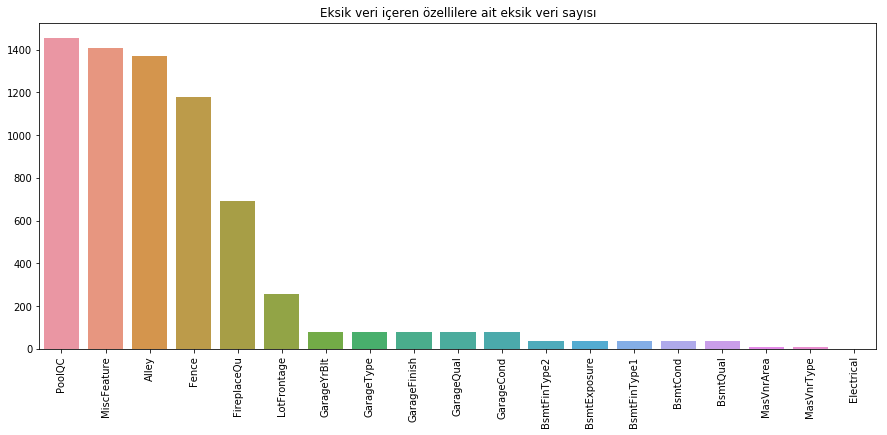

In [7]:
#train veri seti için eksik bilgiler gösterilsin
show_missing_values(train)

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="7."></a>**7. Özelliklerin Birbirleriyle Olan Korelasyonu** 

In [8]:
#veri setindeki özelliklerin birbirleriyle olan korelasyonunu elde edilir.
corr=train.corr().abs()
n_most_correlated=12
#'SalePrice' ile en yüksek korelasyona sahip özellikler elde edilir.
most_correlated_feature=corr['SalePrice'].sort_values(ascending=False)[:n_most_correlated].drop('SalePrice')
#En yüksek korelasyona sahip özelliklerin adları elde edilr. 
most_correlated_feature_name=most_correlated_feature.index.values

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="7.1."></a>**7.1. SalePrice İle En Yüksek Korelasyona Sahip Özellikler**

Text(0.5, 1.0, 'SalePrice ile en fazla korelasyona sahip özellikler')

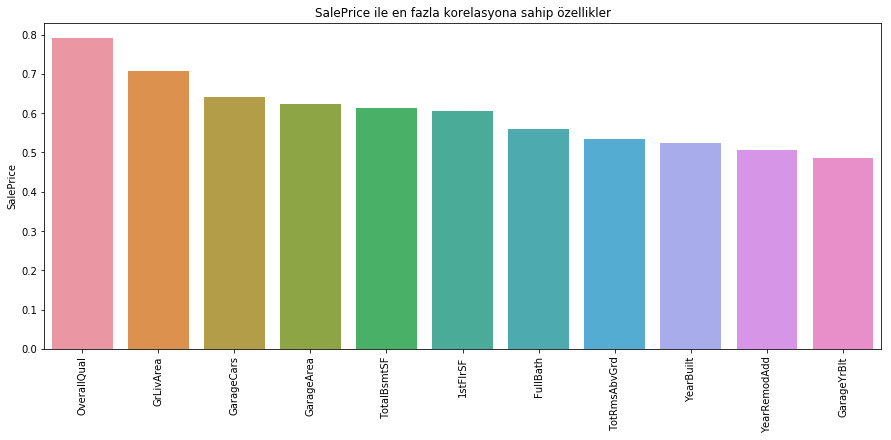

In [9]:
#En yüksek korelasyona sahip özellikler barplot ile gösteririlir
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=most_correlated_feature_name, y=most_correlated_feature)
plt.title("SalePrice ile en fazla korelasyona sahip özellikler")

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="8."></a>**8. Yardımcı Fonksiyon: draw_scatter_pairs()** 

In [10]:
def draw_scatter_pairs(data,cols=4, rows=3):
    feature_names=data.columns.values

    counter=0
    fig, axarr = plt.subplots(rows,cols,figsize=(22,16))
    for i in range(rows):
        for j in range(cols):
            if counter>=len(feature_names):
                break

            name=feature_names[counter]
            axarr[i][j].scatter(x = data[name], y = data['SalePrice'])
            axarr[i][j].set(xlabel=name, ylabel='SalePrice')

            counter+=1


    plt.show()

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="8.1."></a>**8.1. SalePrice İle En Yüksek Korelasyona Sahip Değerlerin Scatter Grafikleri** 

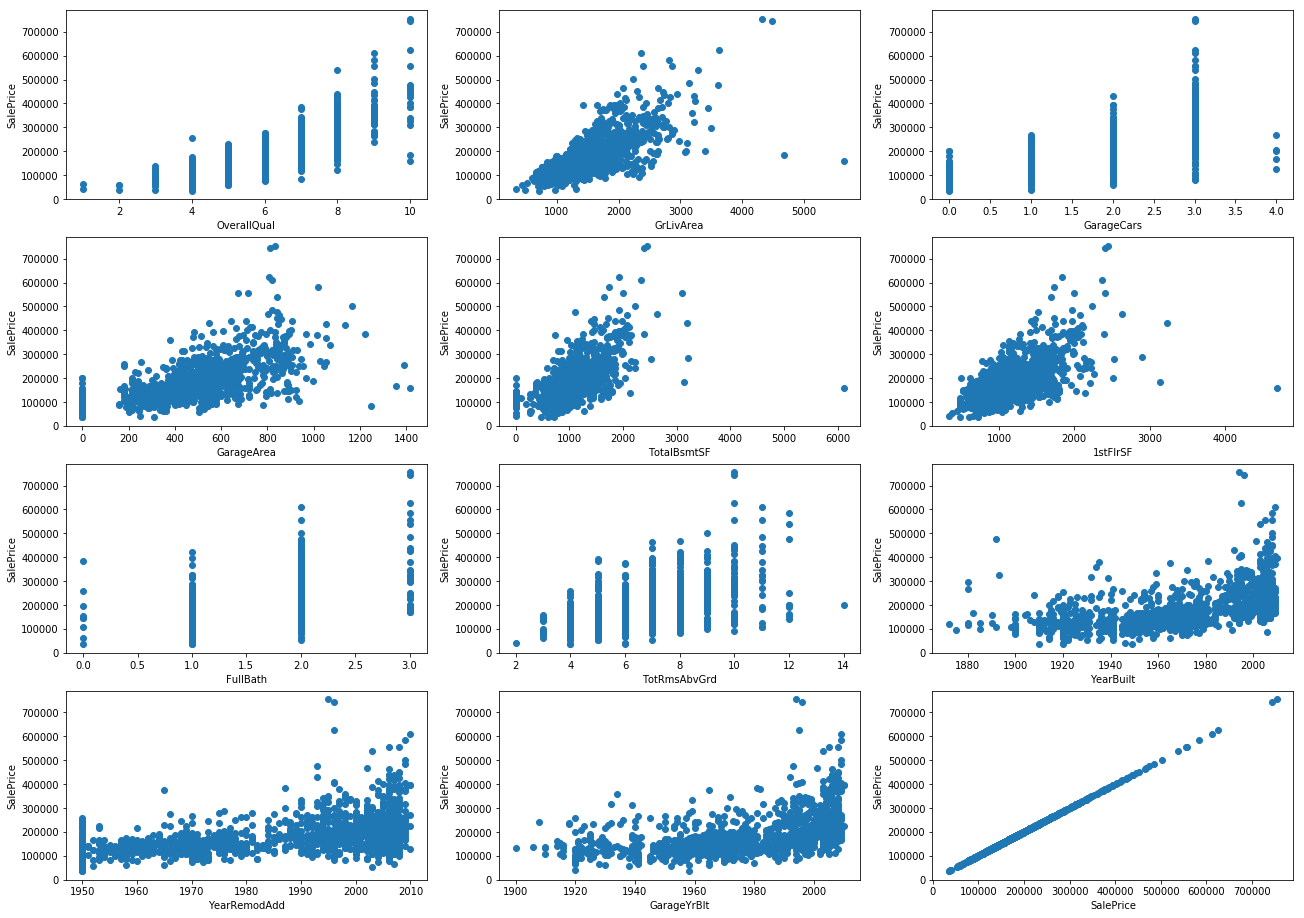

In [11]:
#'SalePrice' ile en yüksek korelasyona sahip özelliklerin 
#grafikle gösterimi
feature_names =list(most_correlated_feature_name) + ['SalePrice']
draw_scatter_pairs(train[feature_names], rows=4, cols=3)

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="9."></a>**9. Aykırı Değerlerin Çıkartılması**

'GrLivArea', TotalBsmtSF' ve '1stFlrSF', grafiklerinde görüldüğü gibi aykırı değerler vardır. Bu aykırı değerleri ayıklayalım. Toplamda iki aykırı değer vardır. 1460 olan örnek sayısı aykırı değerler çıkartıldıktan sonra 1458 olmuştur. 

In [12]:
print("Aykırı değerler çıkarılmadan önce train.shape:",train.shape)

Aykırı değerler çıkarılmadan önce train.shape: (1460, 80)


In [13]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [14]:
print("Aykırı değerler çıkarıldıktan sonra train.shape:",train.shape)

Aykırı değerler çıkarıldıktan sonra train.shape: (1458, 80)


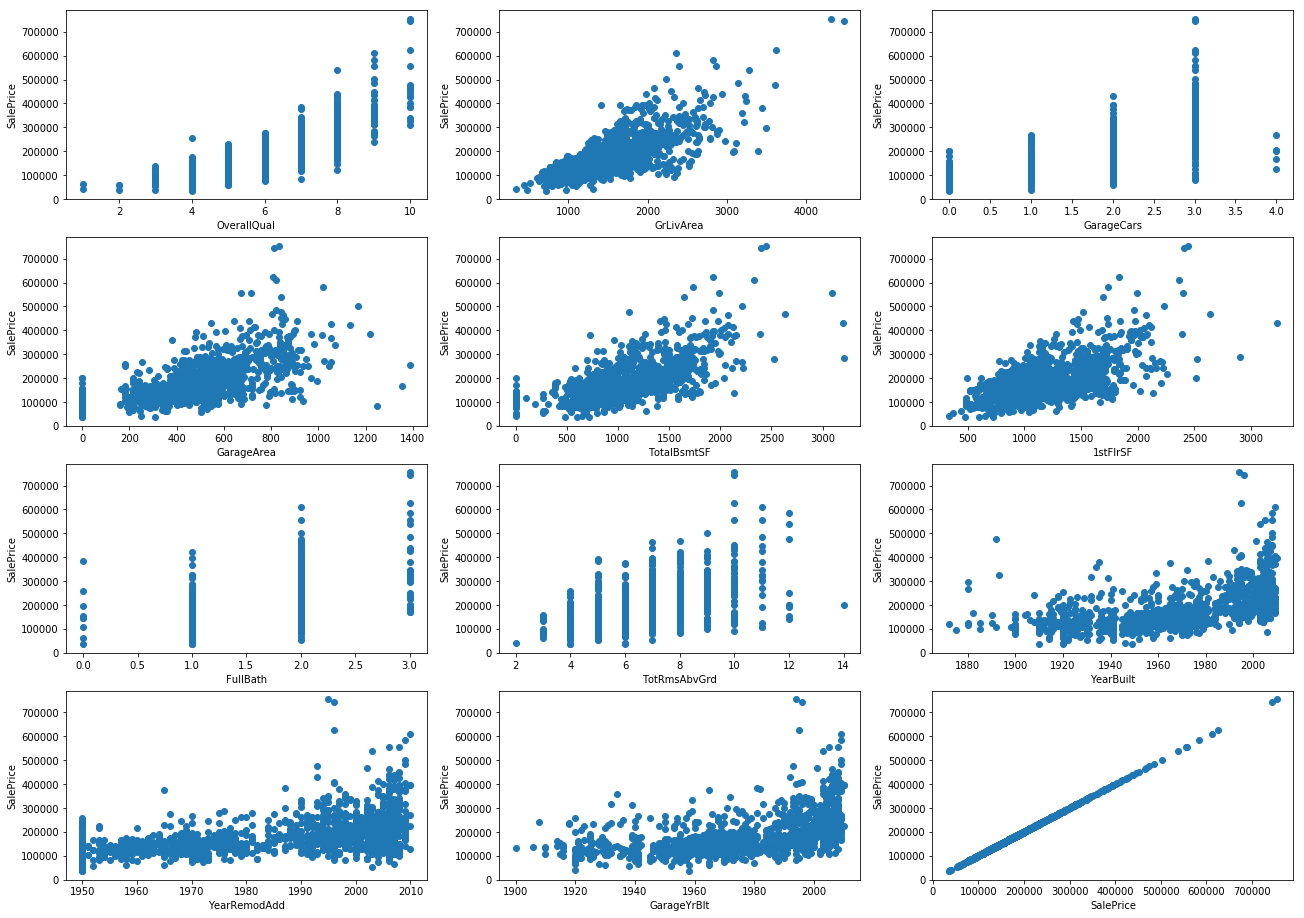

In [15]:
draw_scatter_pairs(train[feature_names], rows=4, cols=3)

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="10."></a>**10. Ön İşleme İçin train ve test Veri Setlerinin Birleştirilmesi** 

Veri setlerinde eksik veriler vardır. train ve test veri setlerini birleştirip eksik verileri doldurmak hem pratiklik açısından hemde tutarlılık açısından daha iyi  olacaktır

In [16]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [17]:
y_train=train['SalePrice']
X_train=train.drop('SalePrice', axis='columns')

#İki veri seti satırlar üst üste gelecek biçimde birleştiriliyor
datasets=pd.concat((X_train, test),axis='index')

print(datasets.shape)

(2917, 79)


PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


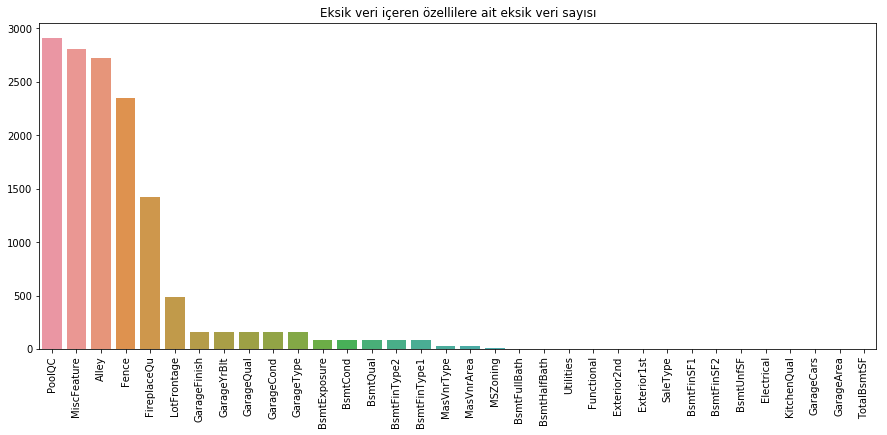

In [18]:
show_missing_values(datasets)

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="11."></a>**11. Ön İşleme Stratejilerinin Belirlenmesi**

In [19]:
#Eksik değerlerin doldurulması için stratejiler belirleniyor
staretegies={}
staretegies['PoolQC']='None'
staretegies['MiscFeature']='None'
staretegies['Alley']='None'
staretegies['Fence']='None'
staretegies['FireplaceQu']='None'

#özel doldurma işleme gerektiren özelliklere kendi adını atıyoruz
staretegies['LotFrontage']='LotFrontage'

staretegies['GarageType']='None'
staretegies['GarageFinish']='None'
staretegies['GarageQual']='None'
staretegies['GarageCond']='None'

staretegies['GarageYrBlt']='Zero'
staretegies['GarageArea']='Zero'
staretegies['GarageCars']='Zero'

staretegies['BsmtFinSF1']='Zero'
staretegies['BsmtFinSF2']='Zero'
staretegies['BsmtUnfSF']='Zero'
staretegies['TotalBsmtSF']='Zero'
staretegies['BsmtFullBath']='Zero'
staretegies['BsmtHalfBath']='Zero'

staretegies['BsmtQual']='None'
staretegies['BsmtCond']='None'
staretegies['BsmtExposure']='None'
staretegies['BsmtFinType1']='None'
staretegies['BsmtFinType2']='None'

staretegies['MasVnrType']='None'
staretegies['MasVnrArea']='Zero'

staretegies['MSZoning']='Mode'

staretegies['Utilities']='Drop'

#özel doldurma işleme gerektiren özelliklere kendi adını atıyoruz
staretegies['Functional']='Functional'

staretegies['Electrical']='Mode'
staretegies['KitchenQual']='Mode'
staretegies['Exterior1st']='Mode'
staretegies['Exterior2nd']='Mode'
staretegies['SaleType']='Mode'

staretegies['MSSubClass']='None'


[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="12."></a>**12. Yardımcı Fonksiyon: fill_missing_values()** 

In [20]:
def fill_missing_values(fill_data, mystaretegies):
    
    for column, strategy in mystaretegies.items():
        if strategy=='None':
            fill_data[column]=fill_data[column].fillna('None')
        elif strategy=='Zero':
            fill_data[column]=fill_data[column].fillna(0)
        elif strategy=='Mode':
            fill_data[column]=fill_data[column].fillna(fill_data[column].mode()[0])   
        elif strategy=='LotFrontage':
            #temp=fill_data.groupby("Neighborhood")
            fill_data[column]=fill_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
        elif strategy=='Drop':
            fill_data=fill_data.drop([column],axis=1)
        elif strategy=='Functional':
            fill_data[column]=fill_data[column].fillna('Typ')
    
    return fill_data

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="13."></a>**13. Eksik Değerlerin Doldurulması** 

In [21]:
datasets_no_missing=fill_missing_values(datasets, staretegies)

In [22]:
#Eksik veri kalmadığından emin olalım
show_missing_values(datasets_no_missing)
print(datasets_no_missing.shape)

Veri setinde eksik bilgi yoktur
Series([], dtype: int64)
(2917, 78)


[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="14."></a>**14. Metin Değerlerin Sayısala Dönüştürülmesi**

In [23]:
#String tipinde değer içeren ancak numerik değerlere sahip sütünları
# str yani object tipine dönüştürüyoruz
for name in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    datasets_no_missing[name]= datasets_no_missing[name].astype(str)

In [24]:
col_names=datasets_no_missing.columns.values
col_types=datasets_no_missing.dtypes
object_cols=[]
numeric_cols=[]
for col_name, col_type in zip(col_names, col_types):
    if col_type=='object':
        object_cols.append(col_name)
    else:
        numeric_cols.append(col_name)
print("String değerler içeren özellikler:")
print(object_cols)
print("\nSayıal değerler içeren özellikler:")
print(numeric_cols)

String değerler içeren özellikler:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Sayıal değerler içeren özellikler:
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', '

In [25]:

label_encoder_col_names = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#for ocn in object_cols:
    #if ocn not in label_encoder_cols:
        #print("{}: {}".format(ocn,len(datasets_no_missing[ocn].unique())))

In [26]:
for col_name in label_encoder_col_names:
    labelEncoder=LabelEncoder()
    labelEncoder.fit(datasets_no_missing[col_name].values)
    datasets_no_missing[col_name]=labelEncoder.transform(datasets_no_missing[col_name].values)

In [27]:
print(datasets_no_missing.shape)

(2917, 78)


[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="15."></a>**15. Özellik Mühendisliği**

Var olan özelliklerden yeni bir özellik türetmeye, özellik mühendisliği adı verilir. Makine öğrenmesi modelinin başarısını artıran özellik türetimi yapabilmek için veri setinin ilgili olduğu alanda uzman kişilerden faydalanmak gerekir. Bu veri seti için sadece bir özellik türetilmiştir.

In [28]:
#Toplam sofa alanı için yeni bir özellik ekleyelim
datasets_no_missing['TotalSF'] = datasets_no_missing['TotalBsmtSF'] + datasets_no_missing['1stFlrSF'] + datasets_no_missing['2ndFlrSF']

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="15.1."></a>**15.1. Sayısal Değerlerin Normal Dağılıma Çekilmesi** 

In [29]:
numeric_feats = datasets_no_missing.dtypes[datasets_no_missing.dtypes != "object"].index

# Özelliklerin çarpıklıkları belirleniyor
skewed_feats = datasets_no_missing[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nNormal dağılımdan uzak değerler: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Normal dağılımdan uzak değerler: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [30]:
skewness = skewness[abs(skewness) > 0.75]
print("Box Cox transform uygulanan özelliklerin sayısı:{}".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    datasets_no_missing[feat] = boxcox1p(datasets_no_missing[feat], lam)

Box Cox transform uygulanan özelliklerin sayısı:59


In [31]:
datasets_no_missing_dummies=pd.get_dummies(datasets_no_missing)
print(datasets_no_missing_dummies.shape)

(2917, 220)


[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="16."></a>**16. Özelliklerin Önemi** 

önem hesaplandı


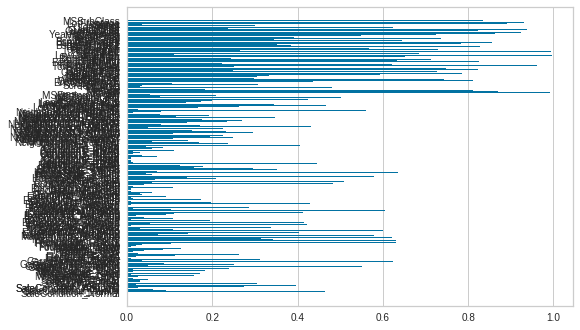

In [32]:
from yellowbrick.features import Rank1D

X_yellow=datasets_no_missing_dummies[:ntrain]
nfeature_name=datasets_no_missing_dummies.columns.values[:-1]
rank1D=Rank1D(features=nfeature_name, algorithm="shapiro")
rank1D.fit(X_yellow[nfeature_name], y_train)
rank1D.transform(X_yellow[nfeature_name])
 
#rank1D.poof()
print("önem hesaplandı")

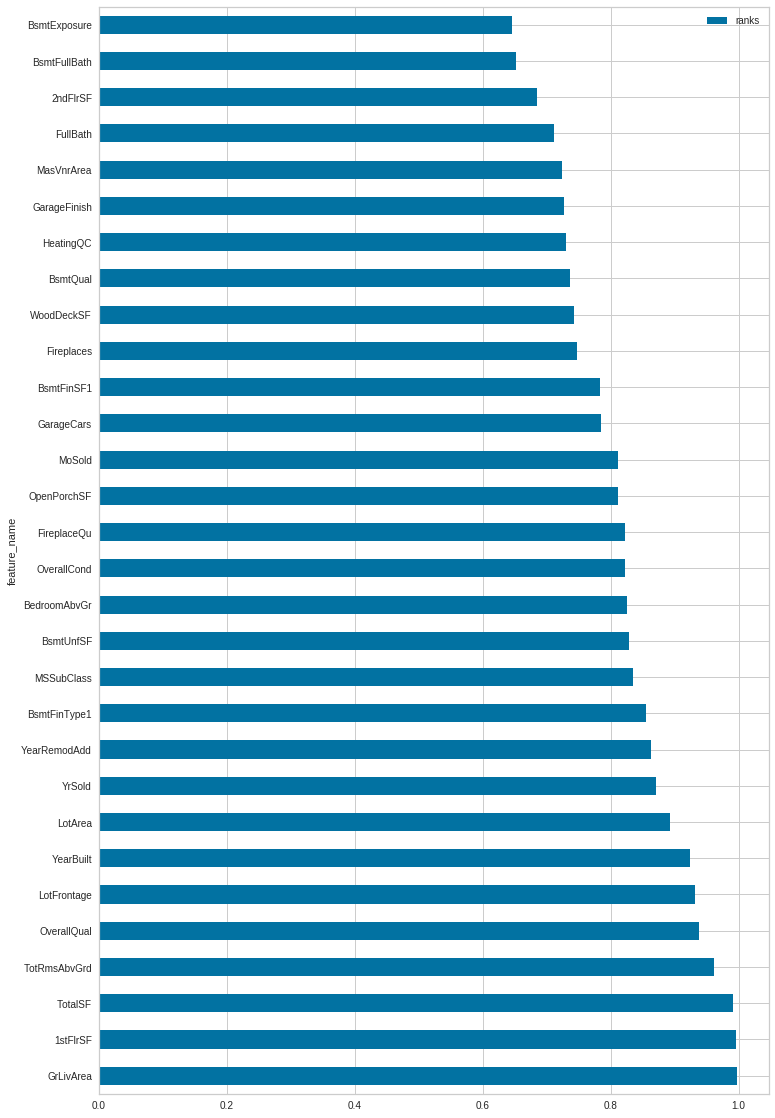

In [33]:

df=pd.DataFrame()
df['feature_name']=nfeature_name
df['ranks']=rank1D.ranks_


df.sort_values(by=['ranks'],ascending=False, inplace=True)
df.set_index('feature_name', inplace=True)
df.head()

fig, ax=plt.subplots(1, figsize=(12,20))
df[:30].plot.barh(ax=ax)

In [34]:
print(datasets_no_missing_dummies.shape)

(2917, 220)


In [35]:
n=30
#En önemli özellikler alınıyor
n_most_important=df.index.values[:n]

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

# <a class="anchor" id="17."></a>**17. Makine Öğrenmesi Modellerinin Uygulanması**

<a class="anchor" id="17.1."></a>**17.1. Ölçeklendirme**

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#en önemli özellikler ölçeklendirilmesi için eğitiliyot
scaler.fit(datasets_no_missing_dummies[n_most_important])

#En önemli özellikler ölçeklendiriliyor
datasets_no_missing_dummies_scaled=scaler.transform(datasets_no_missing_dummies[n_most_important])

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="17.2."></a>**17.2. train ve test Veri Setlerinin Ayrıştırılması**

In [37]:
#Eğitim veri seti
preprocessed_train = datasets_no_missing_dummies_scaled[:ntrain]

#Test veri seti
preprocessed_test = datasets_no_missing_dummies_scaled[ntrain:]

#preprocessed_train.head(10)

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="17.3."></a>**17.3. Yardımcı Fonksiyon:rmsle_cv()** 

In [38]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(preprocessed_train)
    rmse= np.sqrt(-cross_val_score(model, preprocessed_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="17.4."></a>**17.4. XGBoost(“Extreme Gradient Boosting)** 

XGBoost  veri tabanı ve tablo verilerinde başarı oranı yüksek bir algoritmadır. Kaggle yarışmalarında birinciliği elde eden birçok yarışmacı bu algoritmayı kullandığını belirtmiştir. 

XGBoost, gradient boosted decision tree algoritmasının hız ve performans açısından optimize edilmiş versiyonudur. XGBoost algoritması C++ diliyle kodlanmış olmasına rağmen Python, R, Julia ve Java dillerinde kullanılabilecek arayüzlere sahiptir.

Algoritmanın hesaplama zamanı ve hafıza kullanımı açısından verimliliği öncelleyerek gerçekleştirilmiştir. Ayrıca, eksik verilerin otomatik olarak halledilmesi, ağaç oluşumunun paralel programlamaya göre yapılması ve eğitilmiş modellerin yeni veriler üzerinde uygulanabilir olması gibi özelliklere sahiptir. 

XGBoost algoritmasını kullanmak içi iki temel neden vardır; hız ve performans.  [BENCHMARKING RANDOM FOREST IMPLEMENTATIONS](http://datascience.la/benchmarking-random-forest-implementations/) bağlantısında XGBoost ve diğer karar ağacı tabanlı yöntemlerin karşılaştırmasını görebilirsiniz. 

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="17.5." ></a>**17.5. Kullanılacak Regresörlerin Parametre Ataması**

In [39]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [40]:

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [41]:
score = rmsle_cv(model_lgb)
print("LGMRboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LGMRboost score: 23682.4276 (2603.7773)



In [42]:
score = rmsle_cv(model_xgb)
print("XGBRboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGBRboost score: 23552.8993 (2359.6306)



In [43]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="17.6."></a>**17.6. En İyi Modelin Eğitilmesi** 

In [44]:
model_xgb.fit(preprocessed_train, y_train)
xgb_train_pred = model_xgb.predict(preprocessed_train)
xgb_pred = model_xgb.predict(preprocessed_test)
print(rmsle(y_train, xgb_train_pred))

4426.582290139752


[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="17.7."></a>**17.7. Gönderinin Hazırlanması**

In [45]:
print("Gönderi hazırlanıyor")
submision = pd.DataFrame()
submision['Id'] = test_ids
submision['SalePrice'] = xgb_pred
submision.to_csv('n_most_xgb_submission.csv',index=False)
print("Gönderi kaydedildi")
submision.head(20)
print(xgb_train_pred[:20])
print(y_train.values[:20])
print(submision.values[:20])

Gönderi hazırlanıyor
Gönderi kaydedildi
[206928.16 183467.36 220620.62 143277.34 259429.62 141867.12 302761.1
 203055.03 140243.25 121066.01 126853.78 348192.28 140445.61 267521.44
 157641.47 132309.5  147903.1   95881.42 157015.86 137925.44]
[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000]
[[  1461.        125141.4453125]
 [  1462.        157979.921875 ]
 [  1463.        193457.09375  ]
 [  1464.        198188.       ]
 [  1465.        184133.5625   ]
 [  1466.        176952.359375 ]
 [  1467.        182329.796875 ]
 [  1468.        170712.9375   ]
 [  1469.        179181.296875 ]
 [  1470.        123499.5546875]
 [  1471.        202601.75     ]
 [  1472.         95054.4140625]
 [  1473.         92916.25     ]
 [  1474.        153349.390625 ]
 [  1475.        118390.8203125]
 [  1476.        378185.15625  ]
 [  1477.        260083.015625 ]
 [  1478.        280342.6875   ]
 [  1479.        224

[<İçindekiler Menüsüne Git>](#0.) Hızlı Menü:[1.](#1.)  |   [2.](#2.)  |  [3.](#3.)  |  [4.](#4.)  |  [5.](#5.)  |  [6.](#6.)  |  [7.](#7.)  |  [7.1.](#7.1.)  |  [8.](#8.)  |  [8.1](#8.1.) | [9.](#9.)  |  [10.](#10.)  |  [11.](#11.)  |  [12.](#12.)  |  [13.](#13.)  |  [14.](#14.)  |  [15.](#15.)  |  [15.1.](#15.1.)  |  [16.](#16.)  |  [17.](#17.)  |  [17.1.](#17.1.)  |  [17.2.](#17.2.)  |  [17.3.](#17.3.)  |   [17.4.](#17.4.)  |  [17.5.](#17.5.)  |  [17.6.](#17.6.)  |   [17.7. ](#17.7.)

<a class="anchor" id="18."></a>**18. Makine Öğrenmesi Modelinin Kaydedilmesi**